In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
Ec_area = 0.49
Ej_over_area = 48.5
El_per_junction = 35.4

In [120]:
def create_matrix_R(N):
    # Create an NxN identity matrix
    R = np.eye(N+1)

    # Subtract 1 from the diagonal just above the main diagonal
    for i in range(N):
        R[i, i+1] = -1

    # Replace the last row with ones
    R[-1, :] = 1

    return R

def generate_matriz_Cphi(N, CJ, C0, CJb):
    matriz = np.zeros((N+1, N+1))

    # Filling diagonal matrix
    for i in range(N+1):
        matriz[i, i] = 2*CJ + C0 
        if i == 0 or i == N:
            matriz[i, i] = CJb + CJ + C0

    # Filling the positions (i,i+1) y (i+1,i) with -CJ/2
    for i in range(N):
        matriz[i, i + 1] = -CJ
        matriz[i + 1, i] = -CJ

    # Filling the terms C0N and CN0 with -CJb/2
    matriz[0, N ] = -CJb
    matriz[N , 0] = -CJb

    return matriz

def generate_matriz_Ctheta(N, CJ, C0, CJb):
    R_matrix = create_matrix_R(N)
    R_matrix_inv = np.linalg.inv(R_matrix)
    R_matrix_inv_T = R_matrix_inv.T
    Cphi = generate_matriz_Cphi(N, CJ, C0, CJb)
    return R_matrix_inv_T @ Cphi @ R_matrix_inv

def calculate_a_coeff(N, CJ, C0, CJb):
    Ctheta = generate_matriz_Ctheta(N, CJ, C0, CJb)
    return np.sum(Ctheta[1:N,1:N],axis=0)/np.sum(Ctheta[:N, :N]) - 1

def generate_R_1(N, CJ, C0, CJb):
    a_coeff = calculate_a_coeff(N, CJ, C0, CJb)
    R_1_matrix = np.eye(N+1)
    R_1_matrix[1:-1,0] = -1
    R_1_matrix[0,0] = 1 - np.sum(a_coeff)
    R_1_matrix[0,1:-1] = 1+a_coeff 
    
    return R_1_matrix
    
def generate_C_x_1(N, CJ, C0, CJb):
    R_1_matrix = generate_R_1(N, CJ, C0, CJb)
    R_1_matrix_inv = np.linalg.inv(R_1_matrix)
    R_1_matrix_inv_T = R_1_matrix_inv.T
    
    C_X_0_matrix = generate_matriz_Ctheta(N, CJ, C0, CJb)
    
    return R_1_matrix_inv_T @ C_X_0_matrix @ R_1_matrix_inv
    

In [115]:
N = 5
CJ= 1
C0=0
CJb = 0
generate_matriz_Cphi(N, CJ, C0, CJb)

array([[ 1., -1.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0., -1.,  1.]])

In [128]:
# Example usage with N=5
N = 150
CJb = 10
CJ = 50
C0_array = np.linspace(CJ*0.0001,CJ*0.002,100)
C_effective_array = np.zeros_like(C0_array)
for i,C0 in enumerate(C0_array):
    Cphi_matrix = generate_C_x_1(N, CJ, C0, CJb)
    C_effective_array[i]=Cphi_matrix[0,0]

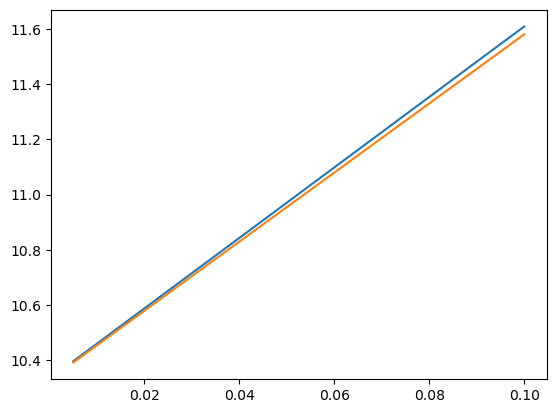

In [139]:
fig,ax = plt.subplots(1,1)
ax.plot(C0_array,C_effective_array)
ax.plot(C0_array,0.33 + CJb  + C0_array/12*N)
# ax.plot(CJ_array,CJb + CJ_array*0.001/12)
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.show()

In [149]:
np.diag(np.ones(5),1)

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
# Example usage with N=5
N = 5
CJ=1
C0 = 2
CJb = 3
Cphi_matrix = calculate_a_coeff(N, CJ, C0, CJb)
Cphi_matrix

(5, 6)


array([-0.69526179, -0.90640049, -0.91181083, -0.8427542 , -0.6437727 ,
       -1.0412988 ])

In [14]:
generate_matriz_Ctheta(N, CJ, C0, CJb)

array([[ 0.62114078, -0.00932131,  0.0665543 ,  0.28814685,  0.76662148,
        -0.02020279],
       [ 0.20922348,  0.23456355, -0.14094562, -0.01347607,  0.20366862,
        -0.01070981],
       [ 0.02557715,  0.10912005,  0.2060173 , -0.1581793 , -0.05281383,
        -0.03944761],
       [ 0.03492909,  0.03170386,  0.14231978,  0.26019149, -0.07449841,
        -0.09034303],
       [ 0.87169109,  0.17529982,  0.23612759,  0.53280393,  1.21738914,
        -0.07816301],
       [ 0.70057473,  0.42953185,  0.41865589,  0.53902393,  0.95782333,
         0.2239048 ]])

In [ ]:
# Example usage with N=5
N = 5
R_matrix = create_matrix_R(N)
R_matrix

array([[ 1., -1.,  0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.],
       [ 0.,  0.,  1., -1.,  0.],
       [ 0.,  0.,  0.,  1., -1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [5]:
for i in range (5):
    print(i)

0
1
2
3
4
